### HDMB51 Dataset - images are 340x256, for optical flow we resize 224x224

#### First steps to get the files and labels for training, validation and testing

##### Variable names:

- train_files
- train_labels
- val_files
- val_labels
- test_files
- test_labels

In [11]:
# Because the commands of the skeleton code are for linux, I just run them in collab and downloaded the result
# to the HMDB51 directory.

# Split dataset into train and test

import glob
from collections import Counter
import os

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]

TRAIN_TAG, TEST_TAG = 1, 2
full_train_files, test_files = [], []
full_train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('HMDB51\\test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)

for filepath in annotation_paths:

    base_name = os.path.basename(filepath)
    class_name = '_'.join(base_name.split('_')[:-2])

    # Doesn't work with the original code given
    # class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])

    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            full_train_files.append(video_filename)
            full_train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(full_train_files)}):\n\t{full_train_files}')
print(f'Train labels ({len(full_train_labels)}):\n\t{full_train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(full_train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(full_train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.

In [13]:
# Split the training data into training 90% and validation 10%

import random

# Keep the files and labels pairing
combined = list(zip(full_train_files, full_train_labels))
random.shuffle(combined)
shuffled_train_files, shuffled_train_labels = zip(*combined)

# Validation is 10%
val_size = int(0.1 * len(shuffled_train_files))

val_files = shuffled_train_files[:val_size]
val_labels = shuffled_train_labels[:val_size]
train_files = shuffled_train_files[val_size:]
train_labels = shuffled_train_labels[val_size:]

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')

print(f'Validation files ({len(val_files)}):\n\t{val_files}')
print(f'Validation labels ({len(val_labels)}):\n\t{val_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(val_labels)).items())}\n')

Train files (756):
	('Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_4.avi', 'smoking_3_smoke_h_cm_np1_fr_med_1.avi', 'Return_of_the_King_1_shoot_bow_u_cm_np1_fr_med_9.avi', 'Radfahren_um_die_Aggertalsperre_06_09_2009_ride_bike_f_cm_np1_ba_med_13.avi', 'Two_Towers_4_shoot_bow_f_nm_np1_le_med_1.avi', 'Maya_beim_Winken_wave_f_cm_np1_fr_med_0.avi', 'Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_1.avi', 'EasternPromises_drink_u_nm_np1_ri_goo_0.avi', '(HQ)_Rock_Climbing_-_Free_Solo_Speed_Climb_-_Dan_Osman_climb_f_cm_np1_le_med_3.avi', 'Faith_Rewarded_throw_f_nm_np1_fr_med_84.avi', 'HannahFront22May08_shoot_bow_u_nm_np1_fr_med_1.avi', 'Veoh_Alpha_Dog_1_smoke_u_nm_np1_fr_med_10.avi', 'prelinger_ControlY1950_jump_f_nm_np1_fr_bad_13.avi', 'Glory_wave_u_nm_np6_fr_med_33.avi', 'Faith_Rewarded_throw_f_nm_np1_le_bad_76.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_n

#### Plotting function to get train/val accuracy and loss and weight saving function

In [14]:
import matplotlib.pyplot as plt
import torch

def plot_training_validation_metrics(train_losses, val_losses, train_accuracies, val_accuracies, filename):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Training Loss', color='skyblue')
    plt.plot(val_losses, label='Validation Loss', color='salmon')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{filename}_loss.png")

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(train_accuracies, label='Training Accuracy', color='skyblue')
    plt.plot(val_accuracies, label='Validation Accuracy', color='salmon')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{filename}_accuracy.png")


# Saving our model weights
def save_model_weights(model, filename):
    torch.save(model.state_dict(), filename)
    print(f"Model weights saved to {filename}")

#### Obtaining optical flow from HMDB51

Takes a few minutes to create all the folders and flows in the optical_flow folder under HMDB51 directory

In [58]:
import cv2
import numpy as np
import os

# Inspired from https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html

video_folder = 'HMDB51/video_data'
flow_folder = 'HMDB51/optical_flow'
# we want to use 16 frames from middle of video
num_frames = 16  

# Compute and save optical flow for a video - We kinda do a dense optical flow (Farneback)
def compute_save_optical_flow(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    
    # Compute middle frame to capture 16 frames around it
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame_index = max(0, total_frames // 2 - num_frames // 2)
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_index)
    
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to grab the first frame.")
        cap.release()
        return
    
    # Resize the frame to 224x224
    first_frame = cv2.resize(first_frame, (224, 224))

    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(first_frame)
    hsv[..., 1] = 255
    
    # Process frames and compute optical flow
    for i in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Resize the frame to 224x224
        frame = cv2.resize(frame, (224, 224))
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        prev_gray = gray
        
        # Convert flow to polar coordinates (magnitude and angle)
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        
        # Use angle for hue and magnitude for value of the HSV image
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        
        # Convert HSV to BGR for saving
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        # Construct filename and save the optical flow image
        flow_filename = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(video_path))[0]}_flow_{i:04d}.png")
        cv2.imwrite(flow_filename, bgr)
    
    cap.release()


In [45]:
# Go through all videos
print("Starting processing...")
for class_folder in os.listdir(video_folder):
    class_path = os.path.join(video_folder, class_folder)
    if os.path.isdir(class_path):  # Check if it is a directory
        print(f"Processing class directory: {class_folder}")
        for video_filename in os.listdir(class_path):
            if video_filename.endswith(('.avi')):
                video_path = os.path.join(class_path, video_filename)
                output_folder = os.path.join(flow_folder, class_folder, os.path.splitext(video_filename)[0])
                os.makedirs(output_folder, exist_ok=True)
                print(f"Processing video: {video_path}")
                print(f"Output will be saved in: {output_folder}")
                compute_save_optical_flow(video_path, output_folder)
                print(f"Processed video {video_filename}")
            else:
                print(f"Skipping non-video file: {video_filename}")
    else:
        print(f"Skipping non-directory item: {class_path}")

Starting processing...
Processing class directory: clap
Processing video: HMDB51/video_data\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi
Output will be saved in: HMDB51/optical_flow\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_0
Processed video #20_Rhythm_clap_u_nm_np1_fr_goo_0.avi
Processing video: HMDB51/video_data\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi
Output will be saved in: HMDB51/optical_flow\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_1
Processed video #20_Rhythm_clap_u_nm_np1_fr_goo_1.avi
Processing video: HMDB51/video_data\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi
Output will be saved in: HMDB51/optical_flow\clap\#20_Rhythm_clap_u_nm_np1_fr_goo_2
Processed video #20_Rhythm_clap_u_nm_np1_fr_goo_2.avi
Processing video: HMDB51/video_data\clap\#20_Rhythm_clap_u_nm_np1_le_goo_3.avi
Output will be saved in: HMDB51/optical_flow\clap\#20_Rhythm_clap_u_nm_np1_le_goo_3
Processed video #20_Rhythm_clap_u_nm_np1_le_goo_3.avi
Processing video: HMDB51/video_data\clap\#20_Rhythm_clap_u_nm_np1_le_goo_4.a

#### Create CNN for optical flow training on the HMDB51 dataset

In [63]:
# Defining the model

import torch.nn as nn

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes=12):
        super(OpticalFlowCNN, self).__init__()

        # Input 48 because we got 16 frames and 3 channels each
        self.conv1 = nn.Conv2d(48, 64, kernel_size=3, stride=2, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(256 * 14 * 14, 1024)
        self.relu_fc1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu4(self.conv4(self.relu3(self.conv3(x)))))
        
        x = self.flatten(x)
        
        x = self.dropout1(self.relu_fc1(self.fc1(x)))
        x = self.fc2(x)
        
        return x

    
# print model summary
from torchsummary import summary
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = OpticalFlowCNN().to(device)
summary(model, (48, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]          27,712
              ReLU-2         [-1, 64, 112, 112]               0
         MaxPool2d-3           [-1, 64, 56, 56]               0
            Conv2d-4          [-1, 128, 56, 56]          73,856
              ReLU-5          [-1, 128, 56, 56]               0
         MaxPool2d-6          [-1, 128, 28, 28]               0
            Conv2d-7          [-1, 256, 28, 28]         295,168
              ReLU-8          [-1, 256, 28, 28]               0
            Conv2d-9          [-1, 256, 28, 28]         590,080
             ReLU-10          [-1, 256, 28, 28]               0
        MaxPool2d-11          [-1, 256, 14, 14]               0
          Flatten-12                [-1, 50176]               0
           Linear-13                 [-1, 1024]      51,381,248
             ReLU-14                 [-

In [93]:
# The custom dataset

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
import os
from PIL import Image

label_to_index = {
    "clap": 0,
    "climb": 1,
    "drink": 2,
    "jump": 3,
    "pour": 4,
    "ride_bike": 5,
    "ride_horse": 6,
    "run": 7,
    "shoot_bow": 8,
    "smoke": 9,
    "throw": 10,
    "wave": 11
}

class OpticalFlowDataset(Dataset):
    def __init__(self, data_directory, file_names, labels, transforms=None):
        # directory of the classes folders
        self.data_directory = data_directory
        # train files or validation files
        self.file_names = file_names
        self.labels = labels
        self.transforms = transforms
        self.samples = self._prepare_dataset()
        
    def _prepare_dataset(self):
        samples = []
        for video_name, label in zip(self.file_names, self.labels):
            # remove .avi from video name to use for directory
            video_name = os.path.splitext(video_name)[0]

            # label is the class folder name
            class_folder = label
            flow_images_path = os.path.join(self.data_directory, 'optical_flow', class_folder, video_name)
            # We have 16 optical flow images
            flow_image_files = []
            for i in range(0, 16):  
                flow_image_path = os.path.join(flow_images_path, f'{video_name}_flow_{i:04d}.png')
                flow_image_files.append((flow_image_path, label))
            samples.append(flow_image_files)
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        flow_image_paths, labels = zip(*sample)

        flow_images = [Image.open(file_path) for file_path in flow_image_paths]
        if self.transforms:
            flow_images = [self.transforms(flow_image) for flow_image in flow_images]
        # Stacking is wrong cause we get a 5D tensor, I think we need to concatenate
        flow_images_concatenated = torch.cat(flow_images, axis=0)
        # All 16 frames have the same label
        label = labels[0]
        # Apparently for the loss function we need to make the string label to a numerical value and then to a tensor
        label_index = label_to_index[label]
        # label_tensor = torch.tensor(label_index, dtype=torch.long)

        return flow_images_concatenated, label_index

# Define your transformations, e.g., resizing, normalization.
transform = transforms.Compose([
    # Resize not needed as images are already 224, 224
    # transforms.Resize((224, 224)),  # Adjust size to match your model's expected input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

Epoch 1/25, Train Loss: 2.5731, Train Accuracy: 0.0873, Validation Loss: 2.4887, Validation Accuracy: 0.0833
Epoch 2/25, Train Loss: 2.4781, Train Accuracy: 0.1085, Validation Loss: 2.6265, Validation Accuracy: 0.1190
Epoch 3/25, Train Loss: 2.4750, Train Accuracy: 0.1071, Validation Loss: 2.4586, Validation Accuracy: 0.0952
Epoch 4/25, Train Loss: 2.4436, Train Accuracy: 0.1217, Validation Loss: 2.4620, Validation Accuracy: 0.1190
Epoch 5/25, Train Loss: 2.4055, Train Accuracy: 0.1323, Validation Loss: 2.3887, Validation Accuracy: 0.1905
Epoch 6/25, Train Loss: 2.4087, Train Accuracy: 0.1310, Validation Loss: 2.3701, Validation Accuracy: 0.1310
Epoch 7/25, Train Loss: 2.3464, Train Accuracy: 0.1772, Validation Loss: 2.3035, Validation Accuracy: 0.1786
Epoch 8/25, Train Loss: 2.3567, Train Accuracy: 0.1812, Validation Loss: 2.4355, Validation Accuracy: 0.1548
Epoch 9/25, Train Loss: 2.3662, Train Accuracy: 0.1548, Validation Loss: 2.3857, Validation Accuracy: 0.1548
Epoch 10/25, Train 

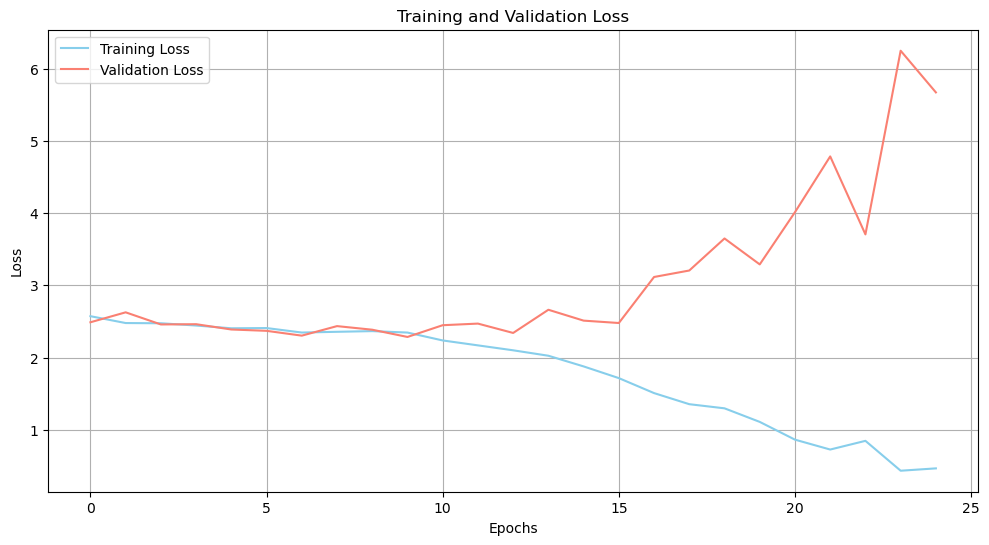

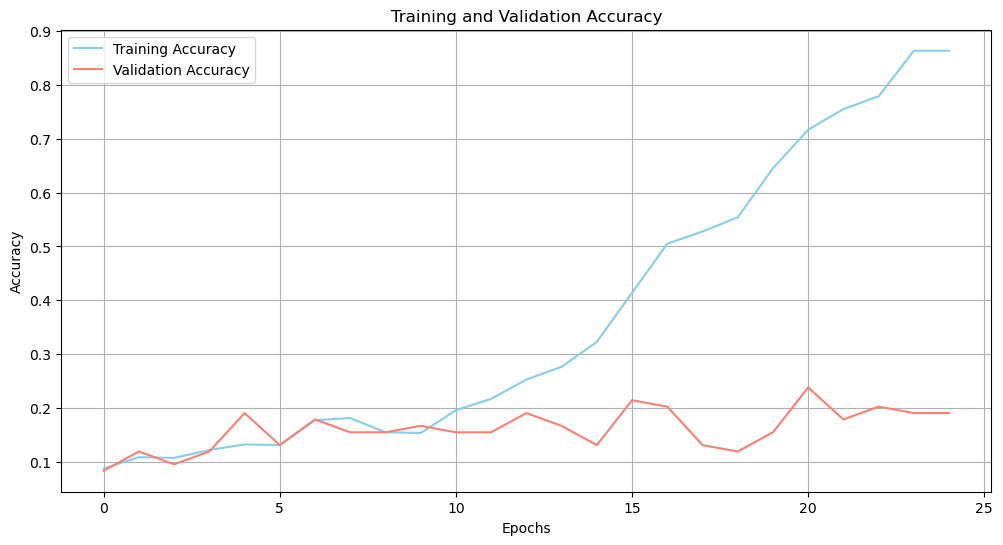

In [96]:
# Training the model

import torch

# Instantiate your dataset
train_dataset = OpticalFlowDataset(
    data_directory='HMDB51',
    file_names=train_files,
    labels=train_labels,
    transforms=transform
)

val_dataset = OpticalFlowDataset(
    data_directory='HMDB51',
    file_names=val_files,
    labels=val_labels,
    transforms=transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Use gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = OpticalFlowCNN(num_classes=12).to(device)
loss_function  = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, running_corrects = 0.0, 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        _, preds = torch.max(outputs, 1)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())
    
    model.eval()
    running_val_loss, running_val_corrects = 0.0, 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            _, preds = torch.max(outputs, 1)
            running_val_loss += loss.item() * inputs.size(0)
            running_val_corrects += torch.sum(preds == labels.data)
    
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    epoch_val_acc = running_val_corrects.double() / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc.item())
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_acc:.4f}')

plot_training_validation_metrics(train_losses, val_losses, train_accuracies, val_accuracies, 'HMDB51-OpticalFlow')
save_model_weights(model, 'HMDB51-OpticalFlow.pth')
